## **_Import Libraries_**

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

## _Gathering Data & Quickly EDA_


In [2]:
#Reading data from CSV
#Converto la colonna "date" in "datetime64[ns] e importo solo le colonne utili all'esercitazione"

directory_path = "C://Users//Andrea Bulanti//Desktop/"
file_name = "owid-covid-data.csv"
file_path = os.path.join(directory_path, file_name)

df = (pd.read_csv(file_path, 
                  parse_dates=["date"], 
                  usecols=["continent", "location", "date", "total_cases", "new_cases", "hosp_patients", "icu_patients"])
     )
df.head(10)

,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
0,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN
1,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN
2,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN
3,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN
4,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN
5,Asia,Afghanistan,2020-01-10,NaN,0.0,NaN,NaN
6,Asia,Afghanistan,2020-01-11,NaN,0.0,NaN,NaN
7,Asia,Afghanistan,2020-01-12,NaN,0.0,NaN,NaN
8,Asia,Afghanistan,2020-01-13,NaN,0.0,NaN,NaN
9,Asia,Afghanistan,2020-01-14,NaN,0.0,NaN,NaN


In [3]:
# Dimensioni del DATASET e relativi metadati

# RangeIndex: 387256 entries, 0 to 387255
# Data columns (total 7 columns)

# dtypes: datetime64[ns](1), float64(4), object(2)
# memory usage: 62.4 MB

# le uniche colonne che non presentano dei valori nulli sono "location" & "date"

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387256 entries, 0 to 387255
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   continent      368729 non-null  object        
 1   location       387256 non-null  object        
 2   date           387256 non-null  datetime64[ns]
 3   total_cases    348333 non-null  float64       
 4   new_cases      376280 non-null  float64       
 5   icu_patients   38644 non-null   float64       
 6   hosp_patients  40181 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 62.4 MB


In [4]:
# Informazioni statistiche circa le colonne numeriche del dataset
# Formattazione dell' output per rimuovere la notazione scientifica

df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,date,total_cases,new_cases,icu_patients,hosp_patients
count,387256.00000,348333.00000,376280.00000,38644.00000,40181.00000
mean,.5f,7386531.56043,8728.78071,668.16388,3949.12670
min,.5f,1.00000,0.00000,0.00000,0.00000
25%,.5f,9448.00000,0.00000,22.00000,194.00000
50%,.5f,79713.00000,0.00000,93.00000,792.00000
75%,.5f,851668.00000,0.00000,420.00000,3089.00000
max,.5f,774954379.00000,44236227.00000,28891.00000,154497.00000
std,nan,43985088.36620,239704.80135,2151.49637,9895.81626


## 1st Request: Numero dei casi totali per continente

[Text(50.72222222222221, 0.5, 'Continenti'),
 Text(0.5, 1.0, 'Numero dei casi per Continente')]

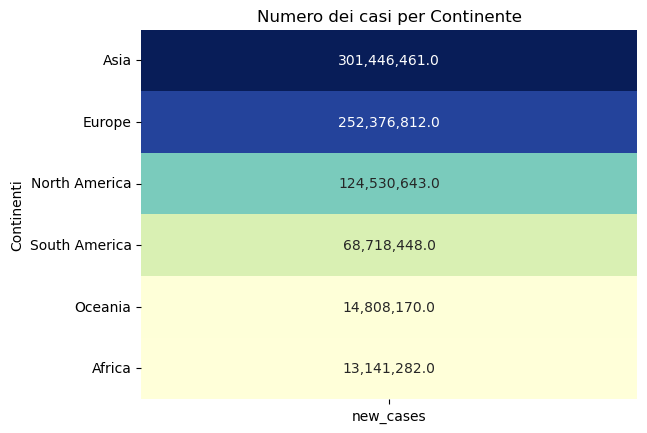

In [5]:
# Utilizzo la colonna "new_cases" per rappresentare il dato.
# Filtro il df rimuovendo le righe prive di location - > nel df non esistono righe prive di continente.
# La colonna rappresenta i nuovi casi confermati di COVID-19.
# Le informazioni nel df sono dettagliate a livello giornaliero.


(sns.heatmap(df.loc[~df["continent"].isna()]
 .groupby("continent")
 .agg({"new_cases":"sum"})
 .sort_values("new_cases", ascending = False) ,annot=True, cmap='YlGnBu', fmt=',', cbar=False)
).set(ylabel = "Continenti", title="Numero dei casi per Continente")


In [6]:
# nel dataframe vi sono 18527 record senza continente, per un totale di 2.509.443.789 contagi
print(len(df.loc[df.continent.isna()].index), df.loc[df.continent.isna()]["new_cases"].sum())


18527 2509443789.0


## 2nd Request: Massimo, Media & Ratio per continente

In [7]:
#Considerando tutti i valori presenti a DB, anche quelli privi di continente.

total_world_cases = df.loc[:,"new_cases"].sum()
total_world_cases

(df.loc[~df["continent"].isna()]
 .groupby("continent")
 .agg(new_cases_max = ("new_cases", "max"),
      new_cases_mean = ("new_cases", "mean"),
      new_cases_sum = ("new_cases", "sum"))
).assign(ratio = lambda x: x["new_cases_sum"] / total_world_cases * 100)

,new_cases_max,new_cases_mean,new_cases_sum,ratio
continent,,,,
Africa,162987.0,150.304606,13141282.0,0.400104
Asia,40475477.0,4181.239490,301446461.0,9.177945
Europe,2417043.0,3257.736053,252376812.0,7.683954
North America,5650933.0,1989.688806,124530643.0,3.791504
Oceania,588813.0,402.253823,14808170.0,0.450855
South America,1283024.0,3199.927730,68718448.0,2.092226


In [8]:
# Considerando solo i record con il continente.

total_world_cases_with_continent = df.loc[~df["continent"].isna(),"new_cases"].sum()
total_world_cases_with_continent

(df.loc[~df["continent"].isna()]
 .groupby("continent")
 .agg(new_cases_max = ("new_cases", "max"),
      new_cases_mean = ("new_cases", "mean"),
      new_cases_sum = ("new_cases", "sum"))
).assign(ratio = lambda x: x["new_cases_sum"] / total_world_cases_with_continent * 100)

,new_cases_max,new_cases_mean,new_cases_sum,ratio
continent,,,,
Africa,162987.0,150.304606,13141282.0,1.695602
Asia,40475477.0,4181.239490,301446461.0,38.895223
Europe,2417043.0,3257.736053,252376812.0,32.563833
North America,5650933.0,1989.688806,124530643.0,16.068018
Oceania,588813.0,402.253823,14808170.0,1.910678
South America,1283024.0,3199.927730,68718448.0,8.866647


## 3rd Request: Italy

In [9]:
df_italy = df.loc[df["location"] == "Italy"].reset_index(drop=True)

C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

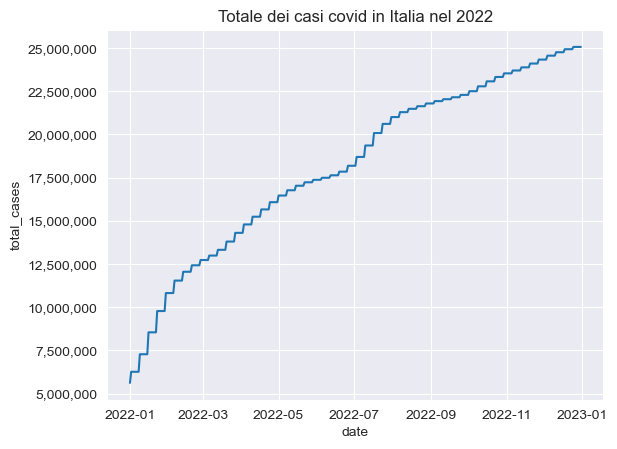

In [10]:
# Rappresentazione dei casi totali

mask = df_italy["date"].dt.year == 2022

sns.despine()
sns.set_style("darkgrid")
grafico = sns.lineplot(data=df_italy[mask], x="date", y="total_cases")

asse_y = grafico.axes.get_yaxis()

# Impostiamo un formattatore per l'asse y
asse_y.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.title("Totale dei casi covid in Italia nel 2022")

# Mostriamo il grafico
plt.show()

C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

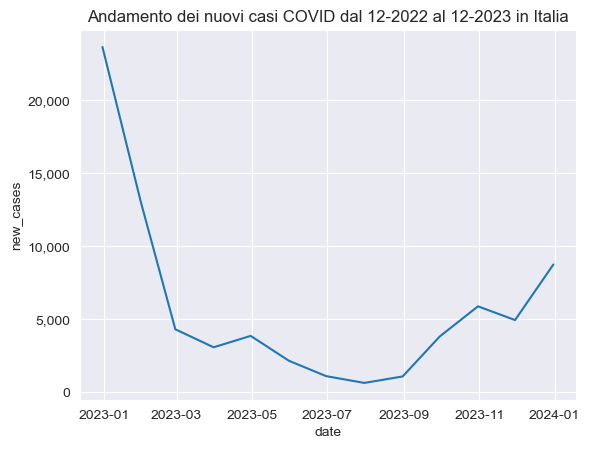

In [11]:
# Mostro i nuovi casi del 2023 rispetto alla data
# Ho pensato di raggruppare la media dei nuovi casi con resample mensile dal 12-2022 al 12-2023

df_italy_resampled = df_italy.set_index("date").resample("M")[["new_cases"]].mean().loc["12-2022" : "12-2023"]
grafico2 = sns.lineplot(data=df_italy_resampled, x=df_italy_resampled.index, y="new_cases")

asse_y = grafico2.axes.get_yaxis()

# Impostiamo un formattatore per l'asse y
asse_y.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.title("Andamento dei nuovi casi COVID dal 12-2022 al 12-2023 in Italia")

# Mostriamo il grafico
plt.show()

In [12]:
# Questo è il dataframe plottato
df_italy_resampled

,new_cases
date,
2022-12-31,23639.967742
2023-01-31,13041.838710
2023-02-28,4298.571429
2023-03-31,3064.129032
2023-04-30,3845.366667
2023-05-31,2138.806452
2023-06-30,1090.200000
2023-07-31,623.354839
2023-08-31,1066.516129


C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

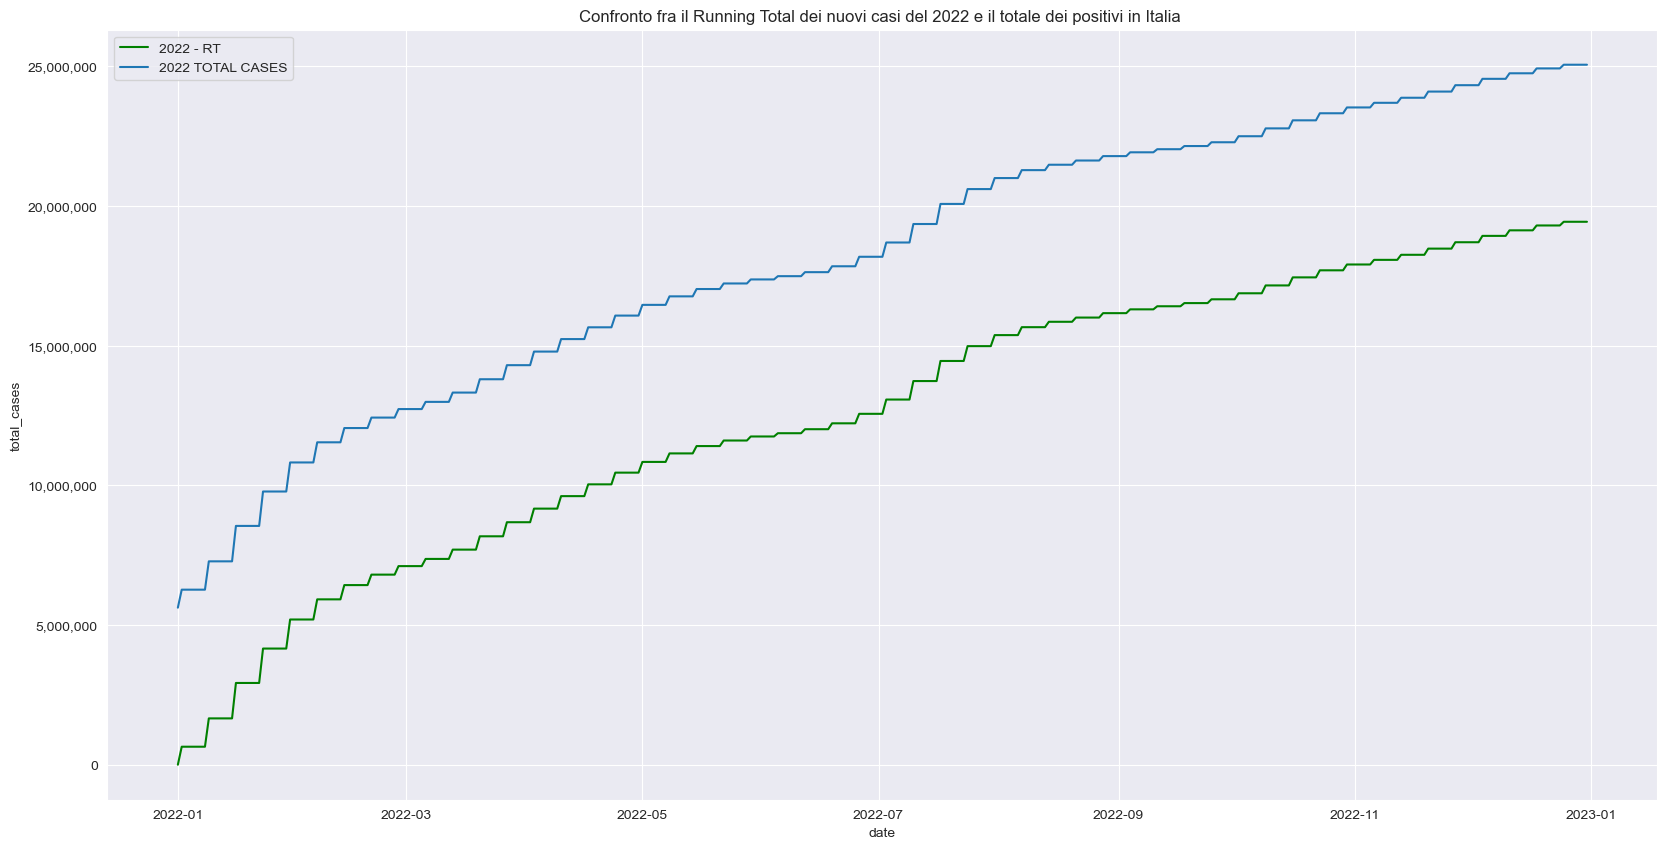

In [13]:
# RT sui nuovi casi nel 2022

df_italy22nc = df_italy.loc[mask, ["date", "new_cases"]].set_index("date")
df_italy22nc['running_total'] = df_italy22nc['new_cases'].cumsum()

fig, axes = plt.subplots(figsize = (20,10))

axes.plot(df_italy22nc.index, df_italy22nc["running_total"], color="green", label = "2022 - RT")
sns.lineplot(data=df_italy[mask], x="date", y="total_cases", ax=axes, label="2022 TOTAL CASES")
asse_y = axes.axes.get_yaxis()
asse_y.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.title("Confronto fra il Running Total dei nuovi casi del 2022 e il totale dei positivi in Italia ")

axes.legend(loc="upper left")

# Entrambi i grafici evidenziano il medesimo incremento dei positivi 

## 4th Request: BoxPlot Italia/Germania/Francia

In [14]:
countries = ["Italy", "Germany", "France"]
df_itfrge = df.set_index("date", drop=True).query("location in @countries").sort_index().loc["2022-05":"2023-04"]


In [15]:
df_itfrge.head()

,continent,location,total_cases,new_cases,icu_patients,hosp_patients
date,,,,,,
2022-05-01,Europe,France,27742592.0,376510.0,1557.0,23327.0
2022-05-01,Europe,Germany,24953200.0,596917.0,1337.0,NaN
2022-05-01,Europe,Italy,16463200.0,383991.0,366.0,10104.0
2022-05-02,Europe,France,27742592.0,0.0,1511.0,23211.0
2022-05-02,Europe,Italy,16463200.0,0.0,368.0,10162.0


In [16]:
df_itfrge.tail()

,continent,location,total_cases,new_cases,icu_patients,hosp_patients
date,,,,,,
2023-04-29,Europe,Germany,38396064.0,0.0,516.0,NaN
2023-04-29,Europe,Italy,25772459.0,0.0,111.0,3045.0
2023-04-30,Europe,Germany,38405257.0,9193.0,512.0,NaN
2023-04-30,Europe,Italy,25795509.0,23050.0,103.0,2977.0
2023-04-30,Europe,France,38842584.0,40443.0,NaN,NaN


C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='location', ylabel='icu_patients'>

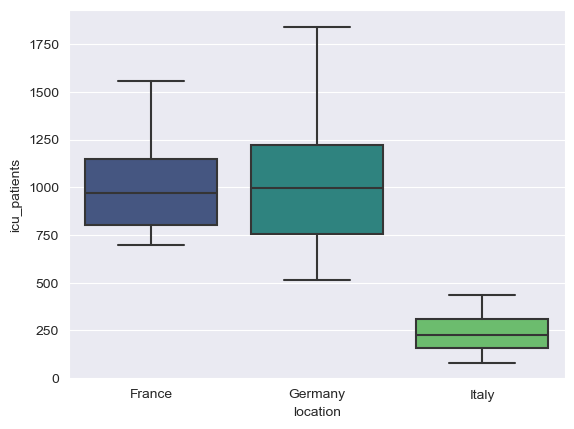

In [17]:
sns.boxplot(data=df_itfrge, x="location", y="icu_patients", palette="viridis")

# In Italia le media dei pazienti in terapia intesiva, per il periodo preso in esame, si aggira attorno ai 250 pazienti.
# In Francia e Germania il valore è molto più alto, circa 1000 pazienti, considerando tuttavia che la popolazione di
# queste due nazioni è maggiore rispetto a quella dell' Italia.

# Le densità dei valori in Germania è più ampia rispetto alla Francia, con un q25 attorno ai 750 pazienti e un q75 attorno ai 1250.
# La mediana si avvicina ai 1000 pazienti in terapia intensiva al giorno.

## 5th Request: Italia/Germania/Francia/Spagna 2023

In [18]:
countries2 = ["Italy", "Germany", "France", "Spain"]
df_itfrge2023 = df.set_index("date", drop=True).query("location in @countries2").loc["2023", ["location", "hosp_patients"]]

In [19]:
df_itfrge2023.loc[df_itfrge2023["location"]=="Spain"].loc["2023-05-30":"2023-07-31"]

,location,hosp_patients
date,,
2023-05-30,Spain,2283.0
2023-05-31,Spain,2217.0
2023-06-01,Spain,2189.0
2023-06-02,Spain,2185.0
2023-06-03,Spain,2259.0
...,...,...
2023-07-27,Spain,NaN
2023-07-28,Spain,NaN
2023-07-29,Spain,NaN


In [20]:
df_itfrge2023.groupby("location")[["hosp_patients"]].sum()

,hosp_patients
location,
France,1382574.0
Germany,0.0
Italy,1175272.0
Spain,354602.0


C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Andrea Bulanti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


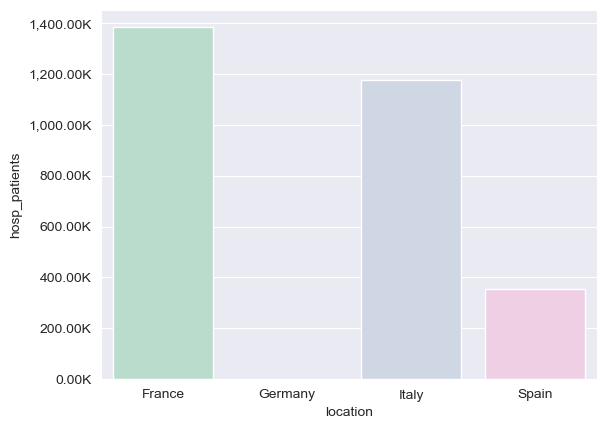

In [21]:
#Rappresento i dati anche con un grafico a barre
from matplotlib import ticker
fig, ax = plt.subplots()

sns.barplot(data=df_itfrge2023,x="location",y="hosp_patients",estimator="sum", palette="Pastel2", errorbar=None)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K'))


In [22]:
#In Germania i dati al 2023 sono assenti:

df_itfrge2023.loc[df_itfrge2023["location"]=="Germany"]["hosp_patients"].value_counts(dropna=False)

hosp_patients
NaN    365
Name: count, dtype: int64

In una situazione simile cercare di rimpiazzare i dati con la media con con tecniche di interpolazione (ffill, bfill, interpolation) non sarebbe corretto in quanto i dati che mancano sono davvero troppi.
L'ideale sarebbe consultare degli esperti di dominio per andare a fondo circa la questione.